Autor: Renan Tonolli Mondini - RA: 191010324 <br><hr>
# Método do Ponto Fixo
 Considerando a função $f(x) = 2x - ln(x) – 4$ e a equação $f(x) = 0$.

Importando as bibliotecas:

In [1]:
import math
import numpy as np
import sympy
import pandas as pd
import seaborn as sns
from sympy import *
from sympy import E
from sympy.solvers import solve
from matplotlib import pyplot as plt
from IPython.display import HTML
from IPython.display import Markdown as md
x = sympy.symbols('x')

Definindo as funções e plotando a intersecção de $y = 0,5 ln(x) + 2$ e $y = x$

In [2]:
def f(x):
    return 2 * x - sympy.ln(x) - 4
def f1(x):
    return 0.5 * sympy.ln(x) + 2
def f2(x):
    return x

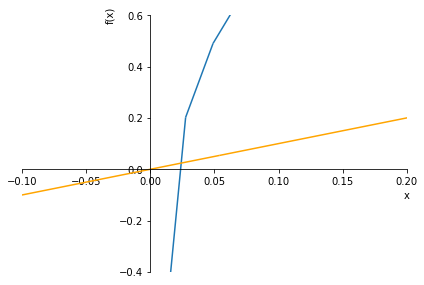

In [3]:
f1_plot = sympy.plotting.plot(f1(x),xlim=(-0.1,0.2),ylim=(-0.4,0.6), show=False)
f2_plot = sympy.plotting.plot(f2(x), line_color = 'orange', show=False)
f1_plot.append(f2_plot[0])
f1_plot.show()

Verificando pelo Teorema de convergência, em que $|g'(x)| < 1$

In [4]:
f1_dx = diff(f1(x), x)
solve(abs(f1_dx) < 1)

((-oo < x) & (x < -0.5)) | ((0.5 < x) & (x < oo))

Portanto, pela análise de convergência o ponto de intersecção está fora dos intervalos da função $g(x)$ adotada.


Adotando a função $g(x) = e^{2x-4}$ e plotando-a com $y = x$.

In [5]:
def g1(x):
    return math.e ** (2 * x - 4)
def g2(x):
    return x

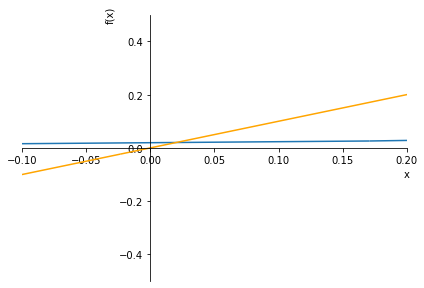

In [6]:
g1_plot = sympy.plotting.plot(g1(x),xlim=(-0.1,0.2),ylim=(-0.5,0.5), show=False)
g2_plot = sympy.plotting.plot(g2(x), line_color = 'orange', show=False)
g1_plot.append(f2_plot[0])
g1_plot.show()

Verificando pelo Teorema de convergência, em que $|g'(x)| < 1$

In [7]:
g1_dx = diff(g1(x), x)
solve(abs(g1_dx) < 1)

x < 1.65342640972003

Portanto, pela análise de convergência o ponto de intersecção está dentro do intervalo da função $g(x)$ adotada.

Definindo um valor inicial de $x_k = 0,03$

In [8]:
x_k = 0.03
e = 0.0001
lista_x_k = list()
lista_g_x = list()
lista_f_x = list()
lista_e = list()

Definindo o erro relativo como restrição $\frac{|x_{k+1}-x_k|}{max\{x_{k+1},1\}}$

In [9]:
def erro_relativo(x_k, x_k1, max_xk_1):
    return (abs(x_k - x_k1)/max_xk_1)

Realizando as iterações do método de ponto fixo:

In [10]:
def metodo_ponto_fixo(x_k, e):

    while True:

        lista_x_k.append(x_k)
        x_k1 = x_k
        x_k = g1(x_k)
        lista_g_x.append(x_k)
        lista_f_x.append(abs(f(x_k)))

        if abs(x_k) < 1:
            max_xk_1 = 1

        else:
            max_xk_1 = abs(x_k)
        
        lista_e.append(abs(x_k - x_k1)/max_xk_1)
    
        if(abs(f(x_k)) >= e and erro_relativo(x_k, x_k1, max_xk_1) > e):
            continue

        else:
            break

    return x_k1

In [11]:
x_k1 = metodo_ponto_fixo(x_k, e)

Plotando a tabela dos resultados obtidos pelas iterações.

In [12]:
df = pd.DataFrame({'x_k': lista_x_k,'g(x_k)': lista_g_x, 'f(x_k)': lista_f_x, 'ER': lista_e})
md(df.to_markdown(numalign = 'center', stralign = 'center', floatfmt = '.6f', index=False))

|   x_k    |  g(x_k)  |  f(x_k)  |    ER    |
|:--------:|:--------:|:--------:|:--------:|
| 0.030000 | 0.019448 | 0.021104 | 0.010552 |
| 0.019448 | 0.019042 | 0.000812 | 0.000406 |
| 0.019042 | 0.019027 | 0.000031 | 0.000015 |

Após 3 iterações pode-se concluir que $x_k = 0,019027$. Além disso na terceira iteração o erro relativo e $|f(x_k)|$ são menor que a precisão de $\varepsilon$.

# Método de Newton

Definindo as funções e plotando a intersecção de $y = 2cos(x)$ e $y = e^x$

In [13]:
def f(x):
    return 2 * sympy.cos(x) - math.e ** (x)
def f1(x):
    return 2 * sympy.cos(x)
def f2(x):
    return math.e ** (x)

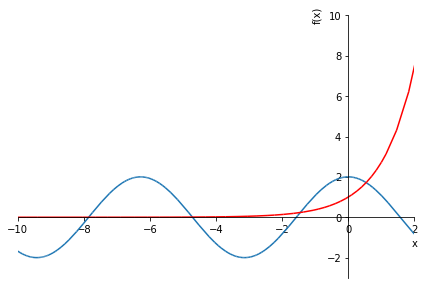

In [14]:
f1_plot = sympy.plotting.plot(f1(x),xlim=(-10,2),ylim=(-3,10), show=False)
f2_plot = sympy.plotting.plot(f2(x), line_color = 'red', show=False)
f1_plot.append(f2_plot[0])
f1_plot.show()

Por meio do gráfico é possível perceber que para a função $e^x$ para $x<0$ sempre tenderá a $0$, e a função $2cos(x)$ será periodica. Portanto para $x<0$ haverá infinitas raízes.

Aplicando o Teorema de Rolle:

In [15]:
f(0) * f(1)

-2.71828182845905 + 2.0*cos(1)

Pode-se concluir que ela é contínua nos intervalos de $I[0,1]$

Definindo as funções e variáveis:

In [16]:
def f_dx(x):
    return -math.e ** x - 2 * sympy.sin(x)

In [17]:
x_k = 0.5
e = 0.00001
lista_x_k.clear()
lista_f_dx = list()
lista_f_x.clear()
lista_e.clear()

Realizando as iterações do método de Newton:

In [18]:
def metodo_newton(x_k, e):
    eh_1_iteração = True
    x_k1 = 0
    while True:

        lista_x_k.append(x_k)
        lista_f_x.append(f(x_k))
        lista_f_dx.append(f_dx(x_k))

        if x_k < 1:
            max_xk_1 = 1

        else:
            max_xk_1 = x_k
        
        lista_e.append(abs(x_k - x_k1)/max_xk_1)

        if not eh_1_iteração and (abs(f(x_k)) >= e and erro_relativo(x_k, x_k1, max_xk_1) > e):
            x_k1 = x_k
            x_k = x_k - (f(x_k)/f_dx(x_k))
        
        elif eh_1_iteração and abs(f(x_k)) >= e:
            x_k1 = x_k
            x_k = x_k - (f(x_k)/f_dx(x_k))
            eh_1_iteração = False

        else:
            break
    return x_k

In [19]:
x_k = metodo_newton(x_k, e)

Plotando os resultados em uma tabela:

In [20]:
df = pd.DataFrame({'x_k': lista_x_k,'f_dx(x_k)': lista_f_dx, 'f(x_k)': lista_f_x,'ER': lista_e})
md(df.to_markdown(numalign = 'center', stralign = 'center', floatfmt = '.6f', index=False))

|   x_k    |  f_dx(x_k)  |  f(x_k)   |    ER    |
|:--------:|:-----------:|:---------:|:--------:|
| 0.500000 |  -2.607572  | 0.106444  | 0.500000 |
| 0.540821 |  -2.747096  | -0.002844 | 0.040821 |
| 0.539786 |  -2.743544  | -0.000002 | 0.001035 |

Após 3 iterações pode-se concluir que $x_k = 0,019027$. Além disso na terceira iteração $|f(x_k)|$ são menor que a precisão de $\varepsilon$.